## Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar anlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attribute Information:

*    Age of patient at time of operation (numerical)
*    Patient’s year of operation (year — 1900, numerical)
*    Number of positive auxillary nodes detected (numerical)
*    Survival status (class attribute):
     *  1 (yes) = The patient survived 5 years or longer
     *  2 (no) = The patient died within 5 years

## Objective

To predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.

## 1. Setting up the Environment 

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv("haberman.csv")


## 2. Data Preparation

In [2]:
# No.of data-points and features in our dataset
print(haberman.shape)

(305, 4)


In [3]:
# Coloumns present in out Dataset

# Assigning coloumns names to our dataset
haberman.columns = ['Age','Op_year','Axil_nodes','Surv_status']

print(haberman.columns)

Index(['Age', 'Op_year', 'Axil_nodes', 'Surv_status'], dtype='object')


In [4]:
haberman['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [5]:
print(haberman.head())

   Age  Op_year  Axil_nodes  Surv_status
0   30       62           3            1
1   30       65           0            1
2   31       59           2            1
3   31       65           4            1
4   33       58          10            1


In [6]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age            305 non-null int64
Op_year        305 non-null int64
Axil_nodes     305 non-null int64
Surv_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


## Observations:

*    There are no missing values in this data set. ( As there are all 305 non-null values)
*    The datatype of ‘survival_status_after_5_years’ column is integer. It has to be converted to categorical datatype.
*    The values of ‘survival_status_after_5_years’ column are not meaningful. Hence they are mapped to ‘yes’ (survived after 5 years) and ‘no’ (not survived after 5 years

In [7]:
# checking for unique values in 
print(haberman['Surv_status'].unique())

[1 2]


In [8]:
# changing the Surv_status coloumn to from integer values 1.2 to  yes.no repectively.

haberman['Surv_status'] = haberman['Surv_status'].map({1:"yes", 2:"no"})
haberman['Surv_status'] = haberman['Surv_status'].astype('category')


print(haberman.head())

   Age  Op_year  Axil_nodes Surv_status
0   30       62           3         yes
1   30       65           0         yes
2   31       59           2         yes
3   31       65           4         yes
4   33       58          10         yes


In [9]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age            305 non-null int64
Op_year        305 non-null int64
Axil_nodes     305 non-null int64
Surv_status    305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None


In [10]:
haberman['Surv_status'].value_counts()

yes    224
no      81
Name: Surv_status, dtype: int64

## Observations:

   1. The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.
   2. Out of 305 patients, 224 patients survived and 81 did not.
   3. Hence, we can conclude that the dataset is imbalanced.

## 3. High Level Statistics

In [11]:
haberman.describe()

,Age,Op_year,Axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


## Observations:

    1. The age of the patients vary from 30 to 83 with the median of 52.
    2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.

In [12]:
# Checking the stats for both the outputs .i.e Yes and No.

status_yes = haberman[haberman["Surv_status"] == "yes"]
status_yes.describe()


,Age,Op_year,Axil_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [13]:
status_no = haberman[haberman["Surv_status"] == "no"]
status_no.describe()


,Age,Op_year,Axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Observations:

*    The mean age and the year in which the patients got operated are almost similar of both the classes.
*    The mean of the nodes of both the classes differs by 5 units approximately.
*    The nodes of patients who survived are less when compared to patients who did not survive.

## 4.  Uni-variate Analysis

We perform uni-variate analysis to describe and find patterns using only a single feature.

### Performing Uni-Variate Analysis using Axil_nodes on X-Axis

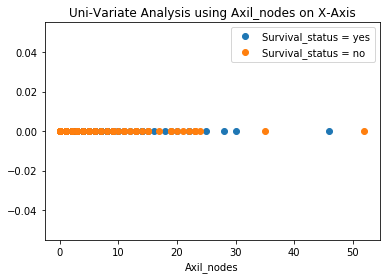

In [14]:
haberman_yes = haberman.loc[haberman["Surv_status"] == "yes"]
haberman_no = haberman.loc[haberman["Surv_status"] == "no"]

plt.plot(haberman_yes["Axil_nodes"], np.zeros_like(haberman_yes['Axil_nodes']), 'o',label='Survival_status = yes')
plt.plot(haberman_no["Axil_nodes"], np.zeros_like(haberman_no['Axil_nodes']), 'o',label = 'Survival_status = no')
plt.title('Uni-Variate Analysis using Axil_nodes on X-Axis')
plt.xlabel('Axil_nodes')
plt.legend()
plt.show()

## 4.1 Probability Density Function (PDF)

### Plotting PDF graph for Axil_Nodes

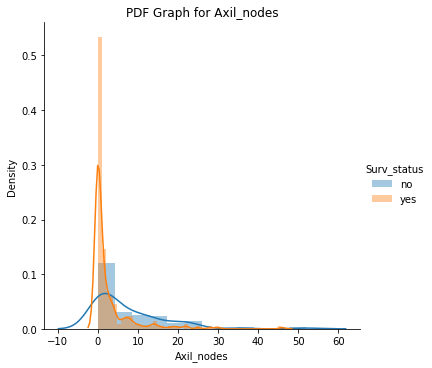

In [15]:
sns.FacetGrid(haberman, hue="Surv_status", height=5) \
   .map(sns.distplot, "Axil_nodes") \
   .add_legend()
plt.title('PDF Graph for Axil_nodes')
plt.xlabel('Axil_nodes')
plt.ylabel('Density')
plt.show()

## Observations:

*    Patients with 0 nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.
*    We observed in the above stats as well, that the mean of Axil_nodes is more when patients survival chances are less.
*    Hence, we can conclude that the more the number of Axil_nodes the less is the chances are of surviving.

### Plotting PDF graph for Age of Patients

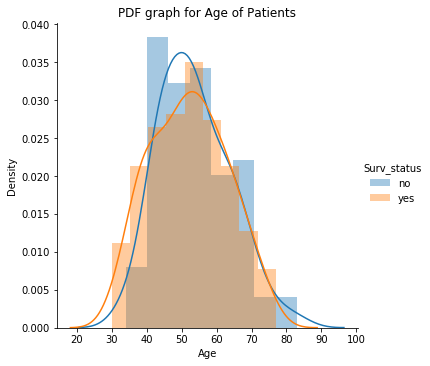

In [16]:
sns.FacetGrid(haberman, hue="Surv_status",  height=5) \
    .map(sns.distplot, "Age") \
    .add_legend()

plt.title('PDF graph for Age of Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Observations:

*    High overlapping is observed, which tells us that survival chances does not depend much upon a person’s age.
*    Still we can see from the graph and roughly tell that people who's age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive.
*    Hence, we cannot decide the survival chances of a patient just by considering the age parameter.

### Plotting PDF graph for year in which Operation was done

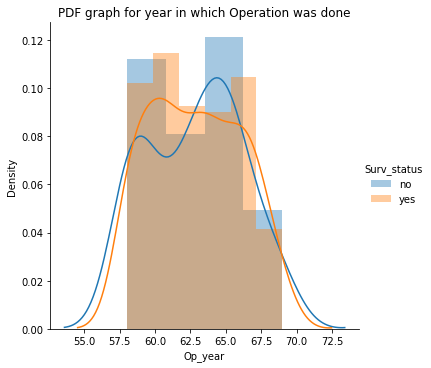

In [17]:
sns.FacetGrid(haberman, hue="Surv_status",  height=5) \
    .map(sns.distplot, "Op_year") \
    .add_legend()

plt.title('PDF graph for year in which Operation was done')
plt.xlabel('Op_year')
plt.ylabel('Density')
plt.show()

## Observations:

*    In this also high over-lapping is observed as this graph only tells how many of the operations were successful and how many weren’t.
*    From the smooth line we can observe that in the years 1960 and 1965 there were more unsuccessful operations.
*    Hence, we decide the patient’s survival chances based on operation year.

## 4.2 Cumulative Distribution function (CDF)

### Plotting CDF graph for Axil_Nodes

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]



[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


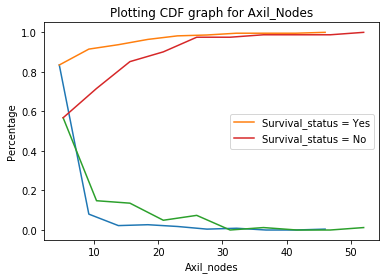

In [18]:
counts1, bin_edges1 = np.histogram(haberman_yes['Axil_nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Survival_status = Yes')
plt.xlabel('nodes')

print("\n\n")

counts2, bin_edges2 = np.histogram(haberman_no['Axil_nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'Survival_status = No')

plt.title('Plotting CDF graph for Axil_Nodes')
plt.xlabel('Axil_nodes')
plt.ylabel('Percentage')
plt.legend()
plt.show()

## Observations:

*    83.55% of the patients who have survived had nodes in the range of 0–4.6
*    And with the increase in the no of Axil_nodes the chances of not surviving increases.

## 4.3 Box Plots

### Plotting Box Plot graphs for all attributes

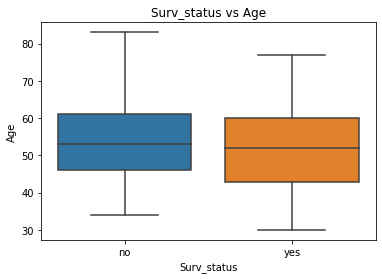

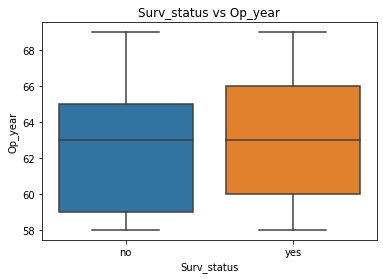

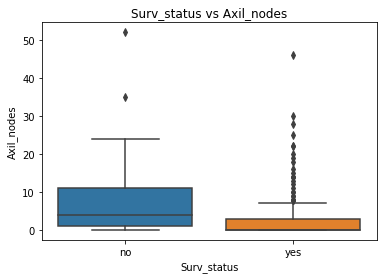

In [19]:
sns.boxplot(x='Surv_status',y='Age',data=haberman)
plt.title('Surv_status vs Age')
plt.show()

sns.boxplot(x='Surv_status',y='Op_year',data=haberman)
plt.title('Surv_status vs Op_year')
plt.show()

sns.boxplot(x='Surv_status',y='Axil_nodes',data=haberman)
plt.title('Surv_status vs Axil_nodes')
plt.show()

### Plotting Violin-Plot graphs for all attributes

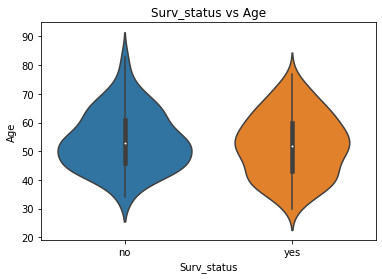

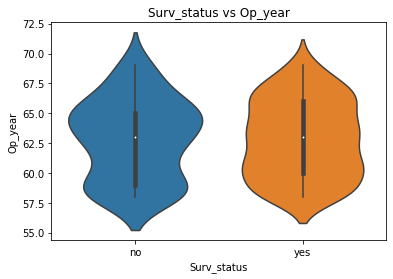

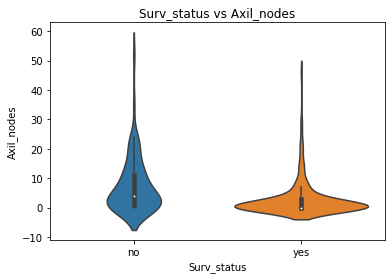

In [20]:
sns.violinplot(x='Surv_status',y='Age',data = haberman,height = 10)
plt.title('Surv_status vs Age')
plt.show()

sns.violinplot(x='Surv_status',y='Op_year',data = haberman,height = 10)
plt.title('Surv_status vs Op_year')
plt.show()

sns.violinplot(x='Surv_status',y='Axil_nodes',data = haberman,height = 10)
plt.title('Surv_status vs Axil_nodes')
plt.show()

## Observations:

*    Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
*    A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
*    The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

## 5. Bi-Variate analysis

## 5.1 2-D Scatter PLot

### Plotting 2-D graph for Axil_Nodes vs Age

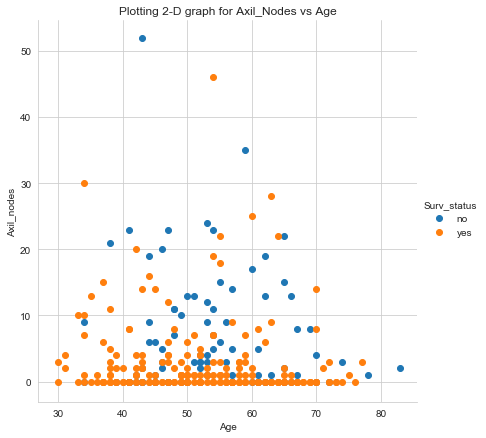

In [21]:
sns.set_style("whitegrid")

sns.FacetGrid(haberman, hue="Surv_status", height=6) \
    .map(plt.scatter, "Age", "Axil_nodes") \
    .add_legend();

plt.title('Plotting 2-D graph for Axil_Nodes vs Age')
plt.show();


## Observations:

*    Patients with 0 nodes are more likely to survive irrespective of their age.
*    There are very less patients with Axil_nodes greater than 25.


## 5.2 Pair-Plots

### Plotting 2-D graphs against all combination of attributes

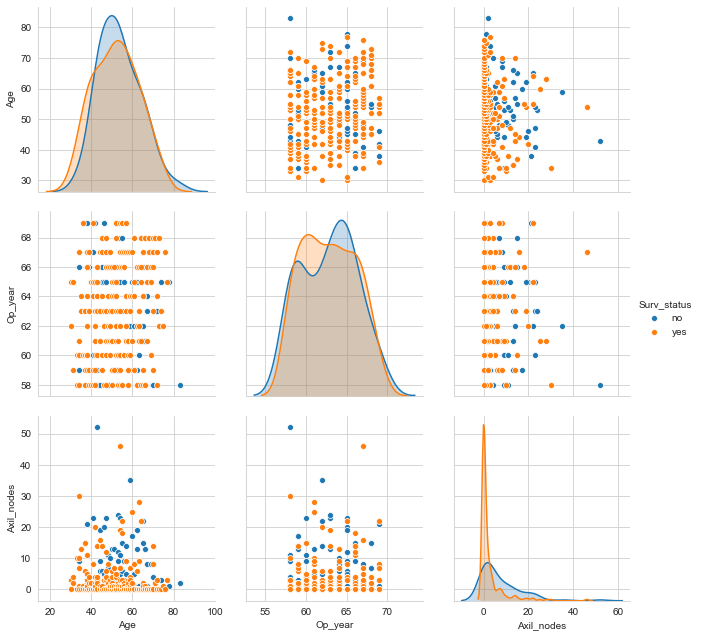

In [22]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="Surv_status",height=3)
plt.show()


## Observations

*    Plot of Op_year vs Axil_nodes are the comparitively better to predict the survival status but it is still hard to determine the Survival_status using pair-plots.




## Multivariate probability density, contour plot.


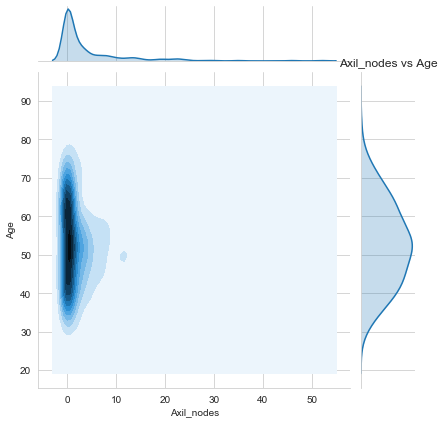

In [23]:
sns.jointplot(x = 'Axil_nodes', y = 'Age', data = haberman, kind = 'kde')
plt.title('Axil_nodes vs Age')
plt.show()

## 6. Conclusions:

*    Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
*    Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes will not always guarantee survival.
*    The objective of classifying the survival status of a new patient based on the given features is difficult as the data is very imbalanced and no attribute can be properly used to predict the Survival status.

## Note : Read and took help from multiple medium articles to gather knowledge 